In [5]:
# Part III - Design a modular photo editing application in Python using OpenCV and NumPy.

# Load an image from file.
# Show the given menu:
# Brightness/Contrast
# Padding with border type
# Thresholding
# Blending: Ask for a second image path and alpha (0 to 1).
# Undo Feature
# History Log: Keep a list of all actions performed. Display the list before exiting or when requested.


# Import 
import cv2                  
import numpy as np         
import matplotlib.pyplot as plt 

# Initialize
history = []
log = []


In [6]:
# Load an image and track it
def load_image(filename):
    img = cv2.imread(filename)
    if img is not None:
        history.clear()
        log.clear()
        history.append(img.copy())
        print("The Image is Loaded.")
    else:
        print("Error!")
    return img

# show preview
def show_preview(original, edited, title="Preview"):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Original Image")
    axes[0].axis('off')
    axes[1].imshow(cv2.cvtColor(edited, cv2.COLOR_BGR2RGB))
    axes[1].set_title("Edited Image")
    axes[1].axis('off')
    plt.suptitle(title)
    plt.show()

In [7]:
# Adjust image brightness
def adjust_brightness(img, value):
    result = cv2.convertScaleAbs(img, beta=value)
    log.append(f"brightness {value}")
    history.append(result.copy())
    show_preview(history[-2], result, "Brightness Adjustment")
    return result

# Adjust image contrast
def adjust_contrast(img, value):
    result = cv2.convertScaleAbs(img, alpha=value)
    log.append(f"contrast {value}")
    history.append(result.copy())
    show_preview(history[-2], result, "Contrast Adjustment")
    return result

In [8]:
# Thresholding
def apply_threshold(img, method):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if method == 'binary':
        flag = cv2.THRESH_BINARY
    else:
        flag = cv2.THRESH_BINARY_INV
    _, result = cv2.threshold(gray, 127, 255, flag)
    result = cv2.cvtColor(result, cv2.COLOR_GRAY2BGR)
    log.append(f"threshold {method}")
    history.append(result.copy())
    show_preview(history[-2], result, "Thresholding")
    return result
    

In [9]:
# Padding
def add_padding(img, size, border_type, ratio=None):
    h, w = img.shape[:2]

    border_map = {
        'constant': cv2.BORDER_CONSTANT,
        'reflect': cv2.BORDER_REFLECT,
        'replicate': cv2.BORDER_REPLICATE
    }
    border = border_map.get(border_type, cv2.BORDER_CONSTANT)

    # If a custom ratio is selected, calculate how to pad accordingly
    if ratio:
        rw, rh = map(int, ratio.split(":"))
        target_w = max(w, int(h * rw / rh))
        target_h = max(h, int(w * rh / rw))
        pad_w = (target_w - w)
        pad_h = (target_h - h)

        # Add padding evenly on all sides while respecting the ratio
        top = pad_h // 2 + size
        bottom = pad_h - pad_h // 2 + size
        left = pad_w // 2 + size
        right = pad_w - pad_w // 2 + size
    else:
        top = bottom = left = right = size

    padded = cv2.copyMakeBorder(img, top, bottom, left, right, border, value=[0, 0, 0])
    log.append(f"padded {size}px with {border_type} (ratio={ratio if ratio else 'none'})")
    history.append(padded.copy())
    show_preview(history[-2], padded, "Padding")
    return padded

In [10]:
# Blend Images
def blend_images(img1, img2_path, alpha):
    img2 = cv2.imread(img2_path)
    if img2 is None:
        print("Error: second image not found.")
        return img1
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0])) 
    blended = ((1 - alpha) * img1 + alpha * img2).astype(np.uint8)
    log.append(f"blended with {img2_path}, alpha={alpha}")
    history.append(blended.copy())
    show_preview(history[-2], blended, "Image Blending")
    return blended


In [11]:

# Undo
def undo():
    if len(history) > 1:
        history.pop()
        log.append("undo")
        print("Undo successful.")
    else:
        print("Nothing to undo.")
    return history[-1]

# Show all actions
def show_log():
    print("\n--- History Log ---")
    for action in log:
        print(action)

# Save image
def save_image(img):
    filename = input("Enter filename: ")
    cv2.imwrite(filename, img)
    print(f"Image saved as {filename}")

In [12]:
# Menu
def main():
    path = input("Enter image filename to load: ")
    img = load_image(path)
    if img is None:
        return

    while True:
        print("""
==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Apply Thresholding
4. Add Padding
5. Blend with Another Image
6. Undo Last Operation
7. View History
8. Save and Exit
""")
        choice = input("Select an option (1-8): ")

        if choice == '1':
            val = int(input("Enter brightness value (+/-): "))
            img = adjust_brightness(img, val)
        elif choice == '2':
            val = float(input("Enter contrast scale (e.g., 1.5): "))
            img = adjust_contrast(img, val)
        elif choice == '3':
            method = input("Threshold type (binary or inverse): ").strip().lower()
            img = apply_threshold(img, method)
        elif choice == '4':
            size = int(input("Enter padding size: "))
            btype = input("Border type (constant, reflect, replicate): ").strip().lower()
            use_ratio = input("Do you want a custom ratio? (y/n): ").lower()
            if use_ratio == 'y':
                ratio = input("Enter ratio (e.g., 4:5): ")
                img = add_padding(img, size, btype, ratio)
            else:
                img = add_padding(img, size, btype)
        elif choice == '5':
            path2 = input("Enter second image filename: ")
            alpha = float(input("Enter alpha value (0 to 1): "))
            img = blend_images(img, path2, alpha)
        elif choice == '6':
            img = undo()
        elif choice == '7':
            show_log()
        elif choice == '8':
            show_log()
            save = input("Do you want to save the final image? (y/n): ").lower()
            if save == 'y':
                save_image(img)
            break
        else:
            print("Invalid choice.")

In [13]:
img = load_image("Image1.jpg")

The Image is Loaded.


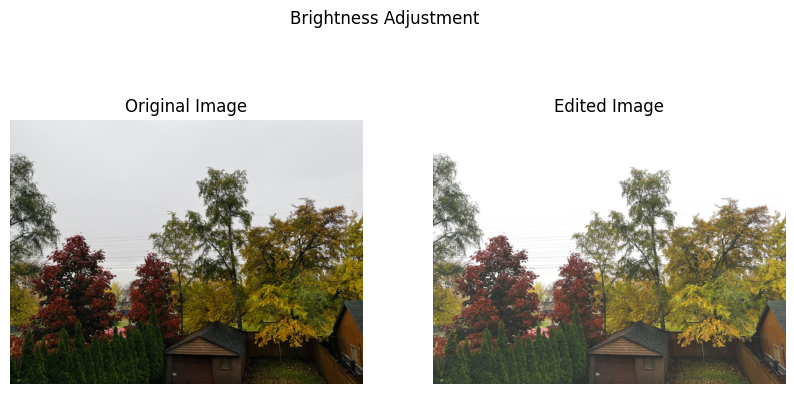

In [14]:
img = adjust_brightness(img, 40)

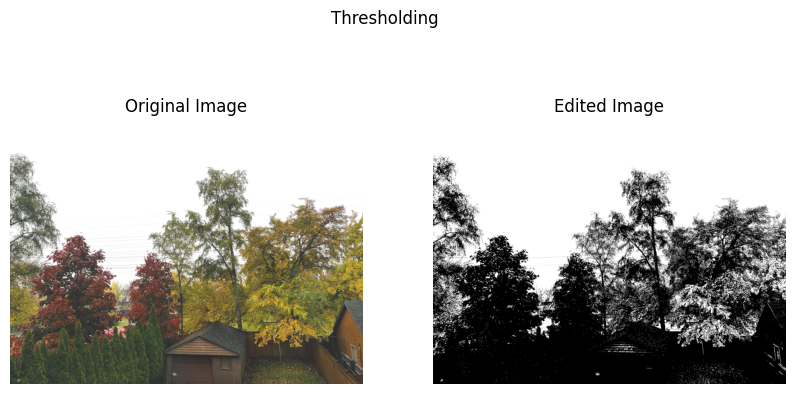

In [15]:
img = apply_threshold(img, "binary")

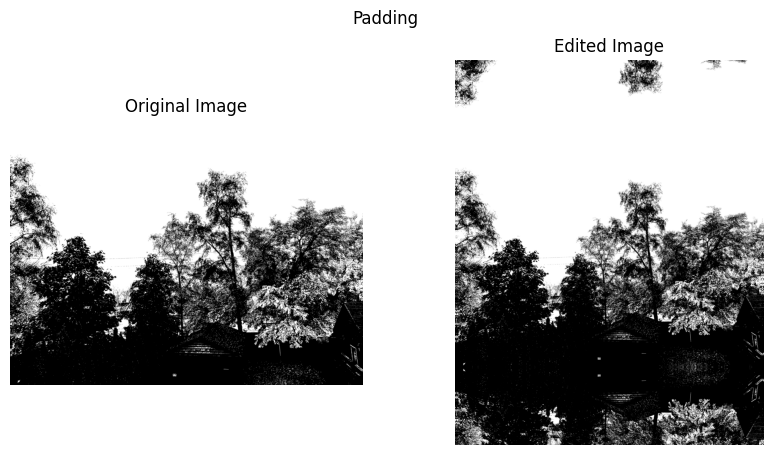

In [16]:
img = add_padding(img, 20, "reflect", "4:5")

In [17]:
show_log()


--- History Log ---
brightness 40
threshold binary
padded 20px with reflect (ratio=4:5)


In [18]:
save_image(img)

Enter filename:  Final_Image.jpg


Image saved as Final_Image.jpg
